In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
d=pd.read_csv('ddos.csv')
d.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,0,17,985356,20,0,7242,0,401,321,362.1,...,0.000000,0.000000,0,0,0.00,0.000,0,0,1,1
1,1,17,1,2,0,802,0,401,401,401.0,...,0.000000,0.000000,0,0,0.00,0.000,0,0,1,1
2,2,17,1,2,0,2944,0,1472,1472,1472.0,...,0.000000,0.000000,0,0,0.00,0.000,0,0,1,0
3,3,17,1,2,0,458,0,229,229,229.0,...,0.000000,0.000000,0,0,0.00,0.000,0,0,1,0
4,4,6,110492576,16,2,0,0,0,0,0.0,...,29.333333,50.042648,124,1,15784628.57,7968096.509,32064666,6533626,1,1


In [ ]:
d.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
x=d.iloc[:,:-1]
y=d.iloc[:,-1]

In [ ]:
y

0        1
1        1
2        0
3        0
4        1
        ..
39995    0
39996    1
39997    0
39998    1
39999    1
Name: Label, Length: 40000, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y)

In [ ]:
from sklearn.metrics import *

DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
p=d.predict(x_test)
print(accuracy_score(y_test,p))
print(classification_report(y_test,p))

0.9454
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      4996
           1       0.91      0.99      0.95      5004

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000




KNN



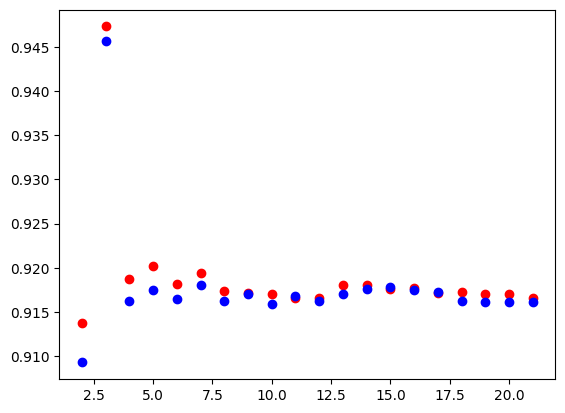

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_range=range(2,22)
train=[]
test=[]
for i in k_range:
  k=KNeighborsClassifier(n_neighbors=i)
  k.fit(x_train,y_train)
  train.append(k.score(x_train,y_train))
  test.append(k.score(x_test,y_test))
plt.scatter(k_range,train,color='red')
plt.scatter(k_range,test,color='blue')

Random forest

MLP

Iteration 1, loss = 0.29663419
Iteration 2, loss = 0.16074222
Iteration 3, loss = 0.14504776
Iteration 4, loss = 0.13860363
Iteration 5, loss = 0.13484012
Iteration 6, loss = 0.13168671
Iteration 7, loss = 0.13109518
Iteration 8, loss = 0.12858144
Iteration 9, loss = 0.13069146
Iteration 10, loss = 0.12794954
Iteration 11, loss = 0.12832789
Iteration 12, loss = 0.12662598
Iteration 13, loss = 0.12867068
Iteration 14, loss = 0.12502013
Iteration 15, loss = 0.12510047
Iteration 16, loss = 0.12374324
Iteration 17, loss = 0.12292166
Iteration 18, loss = 0.12266513
Iteration 19, loss = 0.12189014
Iteration 20, loss = 0.12466299
Iteration 21, loss = 0.12326526
Iteration 22, loss = 0.12142950
Iteration 23, loss = 0.12241333
Iteration 24, loss = 0.12378331
Iteration 25, loss = 0.12036773
Iteration 26, loss = 0.12363877
Iteration 27, loss = 0.12036314
Iteration 28, loss = 0.12135920
Iteration 29, loss = 0.12241068
Iteration 30, loss = 0.12029730
Iteration 31, loss = 0.12088367
Iteration 32, los

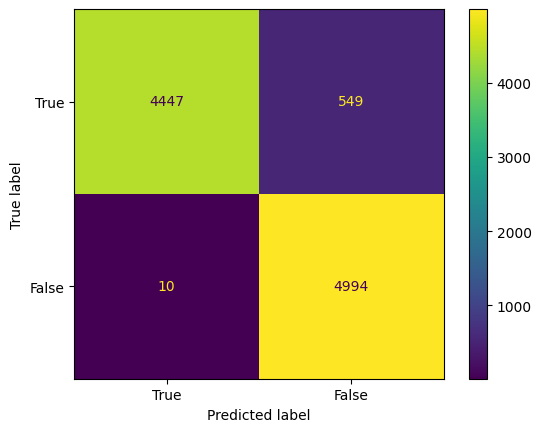

In [ ]:
from sklearn.neural_network import MLPClassifier
m=MLPClassifier(hidden_layer_sizes=(15,5),random_state=5,verbose=True,learning_rate_init=0.01)
m.fit(x_train,y_train)
y_pred=m.predict(x_test)
c=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=c,display_labels=['True','False']).plot()

KERAS


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
X

array([[ 0.55447225, -0.23967839,  0.25678831, ..., -0.26691373,
        -0.24973935,  0.15351757],
       [ 0.55447225, -0.27580823, -0.20855426, ..., -0.26691373,
        -0.24973935,  0.15351757],
       [ 0.55447225, -0.27580823, -0.20855426, ..., -0.26691373,
        -0.24973935,  0.15351757],
       ...,
       [ 0.55447225, -0.2758082 , -0.20855426, ..., -0.26691373,
        -0.24973935,  0.15351757],
       [-1.80056558, -0.27580823, -0.20855426, ..., -0.26691373,
        -0.24973935,  0.15351757],
       [ 0.55447225, -0.27580823, -0.20855426, ..., -0.26691373,
        -0.24973935,  0.15351757]])

In [ ]:
model.add(Dense(8,input_dim=len(X[0,:]),activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=15,verbose=1)

Epoch 1/15
938/938 [==============================] - 2s 2ms/step - loss: 0.1919 - accuracy: 0.9003
Epoch 2/15
938/938 [==============================] - 1s 1ms/step - loss: 0.1919 - accuracy: 0.9003
Epoch 3/15
938/938 [==============================] - 1s 1ms/step - loss: 0.1921 - accuracy: 0.9006
Epoch 4/15
938/938 [==============================] - 1s 1ms/step - loss: 0.1921 - accuracy: 0.9010
Epoch 5/15
938/938 [==============================] - 1s 1ms/step - loss: 0.1924 - accuracy: 0.9009
Epoch 6/15
938/938 [==============================] - 1s 1ms/step - loss: 0.1929 - accuracy: 0.9010
Epoch 7/15
938/938 [==============================] - 1s 2ms/step - loss: 0.1928 - accuracy: 0.9011
Epoch 8/15
938/938 [==============================] - 1s 1ms/step - loss: 0.1923 - accuracy: 0.9014
Epoch 9/15
938/938 [==============================] - 1s 1ms/step - loss: 0.1938 - accuracy: 0.9010
Epoch 10/15
938/938 [==============================] - 1s 1ms/step - loss: 0.1939 - accuracy: 0.9010

In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
model.metrics

In [ ]:
y_pred

array([[4.4417885e-01],
       [9.6732284e-25],
       [9.9746591e-01],
       ...,
       [4.4417885e-01],
       [9.9999994e-01],
       [4.4417885e-01]], dtype=float32)

In [ ]:
c=confusion_matrix(y_test,y_pred.round())

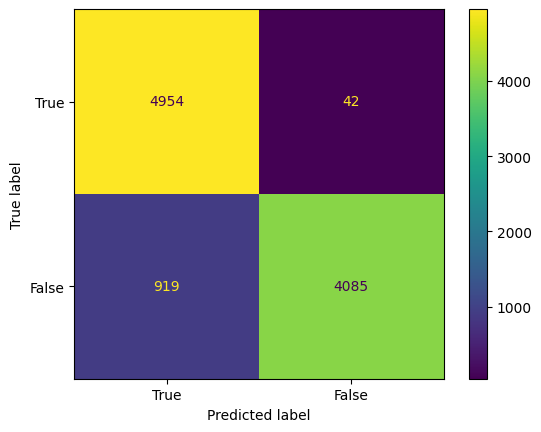

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=c,display_labels=['True','False']).plot()